<a href="https://colab.research.google.com/github/andreregino/machine-learning-classes/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip uninstall scikit-learn
! pip install scikit-learn==0.24.2

Uninstalling scikit-learn-0.24.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.24.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-f7e03b3e.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler, Normalizer
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import math
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

# setting the fonts for graphs
title_font = {'family': 'serif',
        'weight': 'bold',
        'size': 15,
        'style':'italic'}

axis_font = {'family': 'serif',
        'size': 14,
        'style':'italic'}
plt.style.use('ggplot')

## Part I - Regression Task

The work consists of implementing a linear and a polynomial regression to predict the ball trajectory. You are given
two datasets: kick1 and kick2. They represent two diferent trajectories for the ball. You should learn the best model
to fit the data. For this part of the project, you can use all data to learn your model.

Your data is captured with a rate of 60 frames/second, and you have waited 1/3 of a second to make a decision. The data captured refers to the center of the ball. The ball is a size 5 FIFA ball, as depicted next.

In [ ]:
# class responsible for dealing with Linear Regression model
class LinearRegression():
    def __init__(self, alpha, max_iterations=50000, tol=1e-5):
        self.alpha = alpha
        self.max_iterations = max_iterations
        self.tol = tol
        self.errors = []
        
    def gradient_error(self, x, y, h):
        y_estimate = (x).dot(h).flatten()
        eps = (y.flatten()-y_estimate)

        mse = (1.0/2*len(x))* np.sum(np.power(eps, 2))
        grad = -(1.0/len(x)) * eps.dot(x)

        return grad, mse
    
    def fit(self, X, y):
        step = 0
        
        X = np.concatenate((np.ones((len(X),1)),X),axis=1)
        self.w = np.random.rand(X.shape[1])
        eps = np.sum(self.w)
        
        while (eps>self.tol) and (step<self.max_iterations):
            gradient, error = self.gradient_error(X, y, self.w)
            
            self.errors.append(error)
            new_w = self.w - self.alpha * gradient
            
            step+=1
            tol = np.sum(abs(new_w-self.w))
            
            self.w = new_w
        return self.w
    
    def predict(self, X):
        X = np.concatenate((np.ones((len(X),1)),X),axis=1)
        return (X).dot(self.w).flatten()

In [ ]:
# class responsible for dealing with Polynomial Regression model
class PolynomialRegression() :   
    def __init__(self, degree, alpha, max_iter = 50000, tol = 1e-5) :     
        self.degree = degree         
        self.alpha = alpha          
        self.max_iter = max_iter
        self.tol = tol
        self.errors = []
      
    def transform(self, X) :    
        X_transform = PolynomialFeatures(self.degree).fit_transform(X)
        return X_transform
      
    def fit(self, X, Y) :         
        X_transform = self.transform(X)
        self.W = np.zeros(X_transform.shape[1]) 

        eps = 10
        step = 0
        while (eps>self.tol) and (step<self.max_iter): 
            h = self.predict(X)
            error = h - Y
            new_w = self.W - self.alpha * (1 / len(X)) * np.dot(X_transform.T, error) 
          
            self.errors.append(error)
            step+=1
            eps = np.sum(abs(new_w-self.W))
            
            self.W = new_w
        return self.W
        
    def predict( self, X ) :          
        X_transform = self.transform(X)
          
        return np.dot(X_transform, self.W)

In [ ]:
# function responsible for plotting the results of the ball trajectory towards the goal
def show_trajectory(data, models):
    x, y, z = data
    lr_x, lr_y, lr = models
    
    time_pred = np.linspace(1/60,2/3,120)

    plt.style.use('default')
    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    x1 = lr_x.predict(time_pred.reshape(-1,1))
    y1 = lr_y.predict(time_pred.reshape(-1,1))
    z1 = lr.predict(np.array([x1,y1]).T)
    axes = [ax1, ax2, ax3]

    CX, CY =  np.meshgrid(np.linspace(-3,3,2), np.linspace(0,2,2))
    CZ =  np.zeros(CX.shape)

    for ax in axes:
        ax.plot_surface(CX, CY, CZ, shade=False, color='g', alpha=.4)
        ax.plot(x1, y1, z1, color='red', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.plot(x, y, z.flatten(), color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
        ax.plot([-3, -3, 3, 3], [0, 0.3, 0.3, 0], zdir='y', zs=0, c='b')

    ax1.view_init(elev=90, azim=10)
    ax2.view_init(elev=10, azim=10)
    ax3.view_init(elev=0, azim=80) 
    plt.show()
    
    display(HTML(str("<font size=2><i> Predict Value: </i></font>"+'('+str(round(x1[-1],2))+', '+str(round(y1[-1],2))+', '+str(round(z1[-1],2))+')')))

### Kick 1

In [ ]:
# importing dataset kick1
kick1 = np.genfromtxt('kick1.dat', dtype=None, delimiter=' ')

X = kick1[:,:2]
Y = kick1[:,2]

x = X[:, 0]
y = X[:, 1]
z = Y

#### Linear Regression

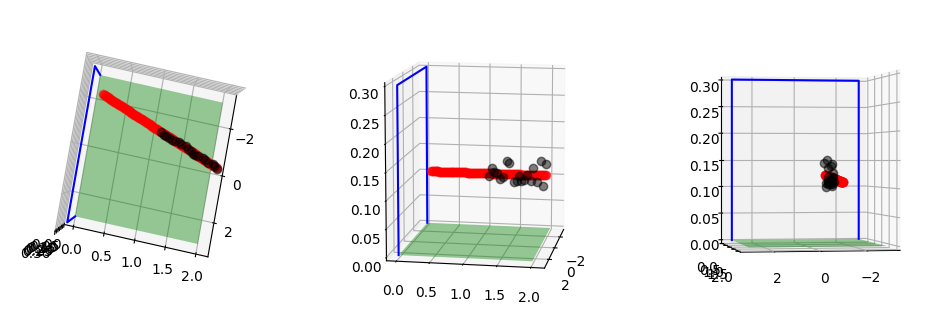

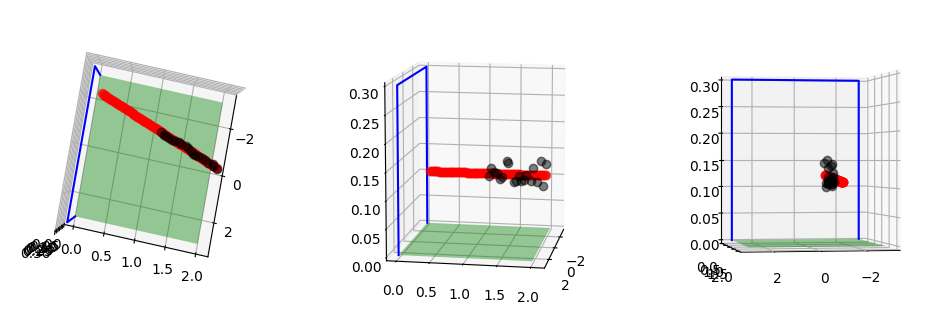

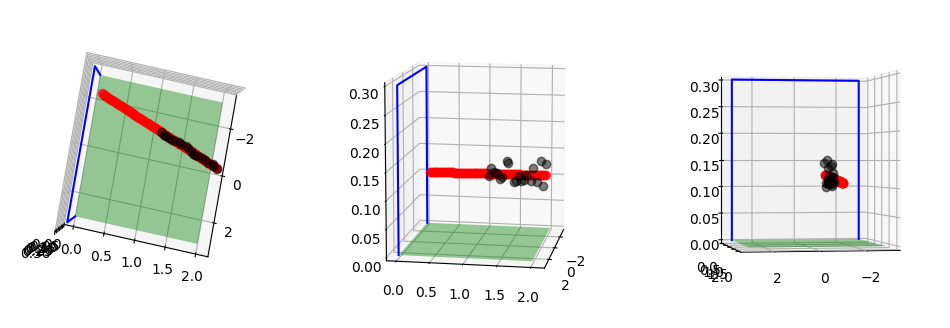

In [ ]:
# defining 3 learning rates and 3 different moment of time
learning_rate = [0.01, 0.05, 0.1]
time = np.linspace(1/60,1/3,20)

# displaying the linear regression estimative with the 3 learning rates
display(HTML(str("<font size=4><b> Kick 1 - Linear Regression </b></font>")))

for i in learning_rate:
    display(HTML(str("<font size=3><b> - Learning Rate: </b></font>"+str(i))))
    
    lr_x = LinearRegression(i)
    func_x = lr_x.fit(time.reshape(-1,1),X[:,0])

    lr_y = LinearRegression(i)
    func_y = lr_y.fit(time.reshape(-1,1),X[:,1])

    lr = LinearRegression(i)
    func = lr.fit(X,Y.flatten())
    
    show_trajectory((x,y,z), (lr_x,lr_y,lr))
    
    y_pred = lr.predict(X)

    display(HTML(str("<font size=2><i> MSE: </i></font>"+str(round(mean_squared_error(Y, y_pred),2)))))
    display(HTML(str("<font size=2><i> MAPE: </i></font>"+str(round(mean_absolute_percentage_error(Y, y_pred),2)))))

As the graphs and data above show, the Linear Regression is one of the best choices for this data. Considering all the learning rates tested, we verified that this kick will be a goal.

#### Polynomial Regression

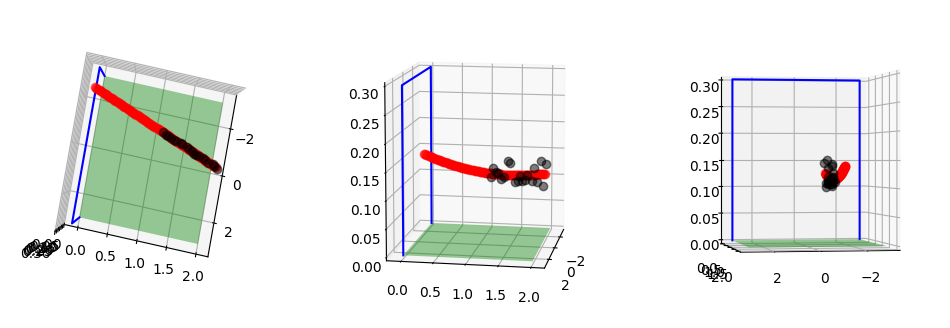

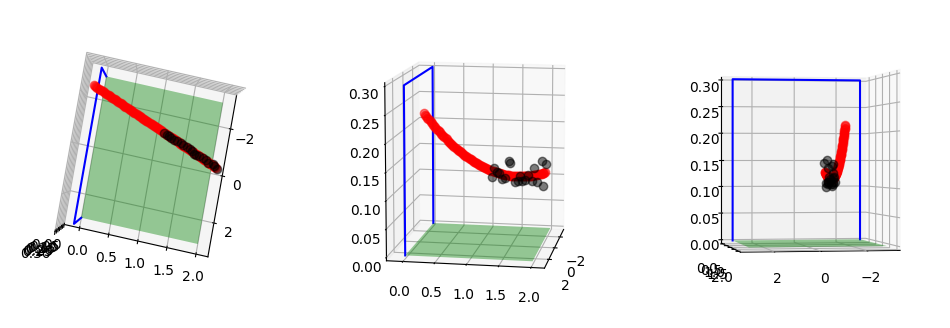

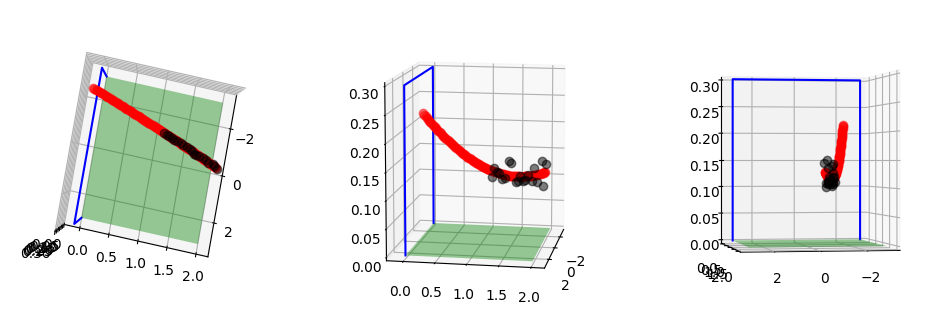

In [ ]:
# displaying the polynomial regression (degree 2) estimative with the 3 learning rates
display(HTML(str("<font size=4><b> Kick 1 - Poly Regression </b></font>")))

for i in learning_rate:
    display(HTML(str("<font size=3><b> - Learning Rate: </b></font>"+str(i))))
    
    lr_x = PolynomialRegression(2, i)
    func_x = lr_x.fit(time.reshape(-1,1),X[:,0])

    lr_y = PolynomialRegression(2, i)
    func_y = lr_y.fit(time.reshape(-1,1),X[:,1])

    lr = PolynomialRegression(2, i)
    func = lr.fit(X,Y.flatten())
    
    show_trajectory((x,y,z), (lr_x,lr_y,lr))
    
    y_pred = lr.predict(X)

    display(HTML(str("<font size=2><i> MSE: </i></font>"+str(round(mean_squared_error(Y, y_pred),2)))))
    display(HTML(str("<font size=2><i> MAPE: </i></font>"+str(round(mean_absolute_percentage_error(Y, y_pred),2)))))

The Polynomial Regression with degree 2 could be used to this dataset (kick 1), however the linear regression presents a bettter fit of the curve when we visually compare them (in this case we only see the plots of the curve). The learning rate, in this case, is highly correlated to the "ascending trajectory" of the ball in the end of prediction.

Considering all the learning rates tested, we verified that this kick will be a goal.

### Kick 2

In [ ]:
# importing dataset kick2
kick2 = np.genfromtxt('kick2.dat', dtype=None, delimiter=' ')

X = kick2[:,:2]
Y = kick2[:,2]

x = X[:, 0]
y = X[:, 1]
z = Y

#### Linear Regression

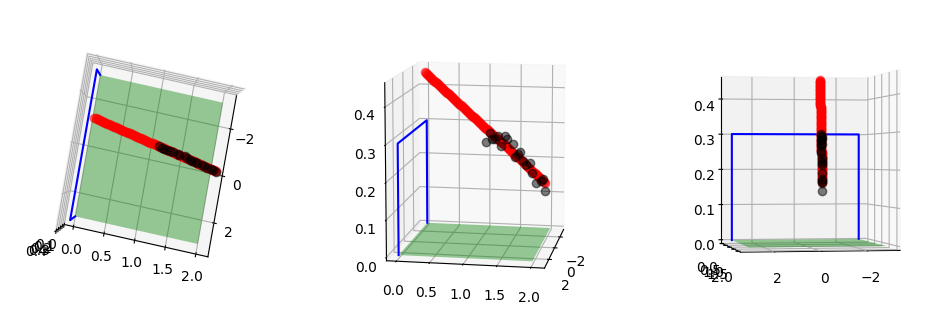

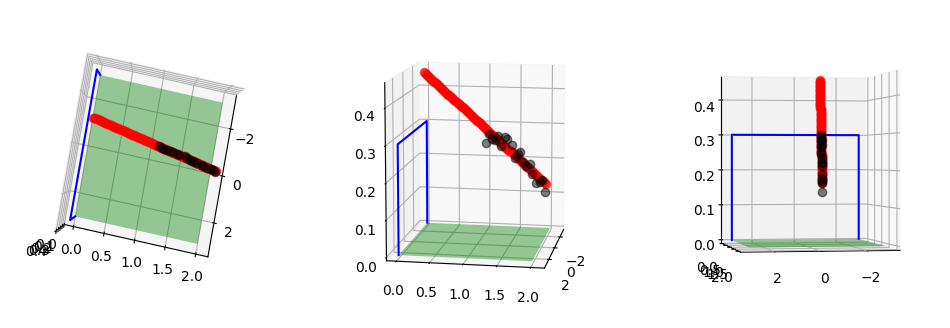

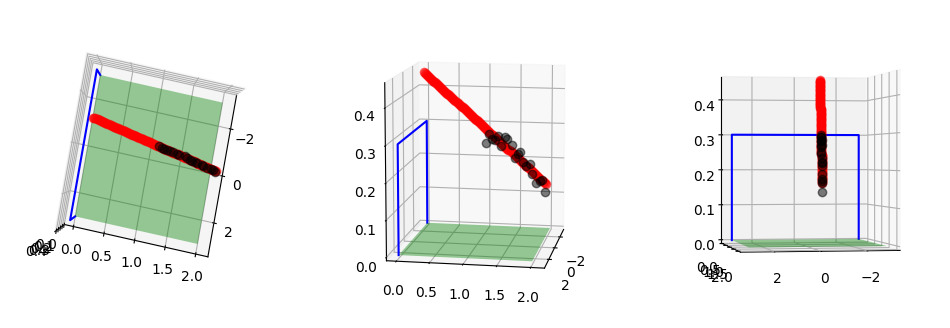

In [ ]:
# displaying the linear regression regression estimative with the 3 learning rates
learning_rate = [0.01, 0.05, 0.1]
time = np.linspace(1/60,1/3,20)

display(HTML(str("<font size=4><b> Kick 2 - Linear Regression </b></font>")))

for i in learning_rate:
    display(HTML(str("<font size=3><b> - Learning Rate: </b></font>"+str(i))))
    
    lr_x = LinearRegression(i)
    func_x = lr_x.fit(time.reshape(-1,1),X[:,0])

    lr_y = LinearRegression(i)
    func_y = lr_y.fit(time.reshape(-1,1),X[:,1])

    lr = LinearRegression(i)
    func = lr.fit(X,Y.flatten())
    
    show_trajectory((x,y,z), (lr_x,lr_y,lr))
    
    y_pred = lr.predict(X)

    display(HTML(str("<font size=2><i> MSE: </i></font>"+str(round(mean_squared_error(Y, y_pred),2)))))
    display(HTML(str("<font size=2><i> MAPE: </i></font>"+str(round(mean_absolute_percentage_error(Y, y_pred),2)))))

Using the Linear Regression for Kick 2, we can see that the ball will pass over the upper goal dash. To the best of our knowledge and using some physics "theory", we understand that this is not the best fit for this curve, given that the gravity will make the ball fall.

Considering all the learning rates tested, we verified that this kick will be out of the goal.

#### Polynomial Regression

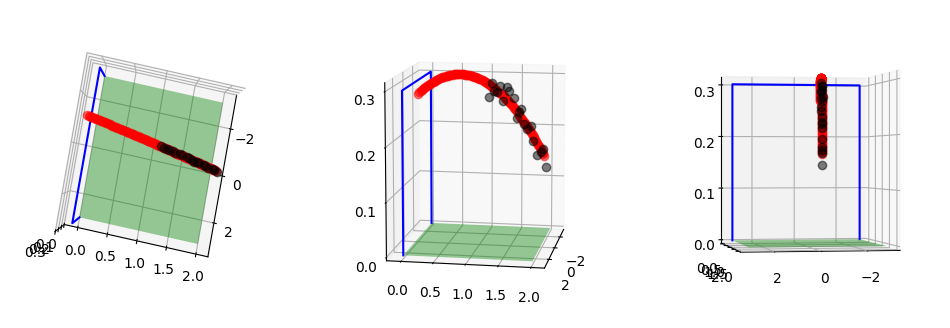

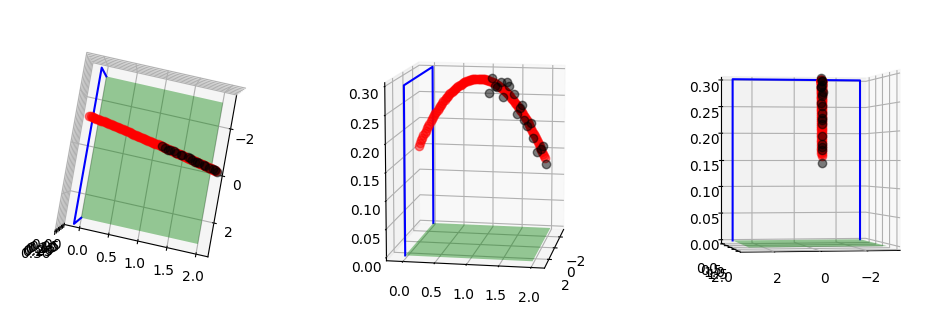

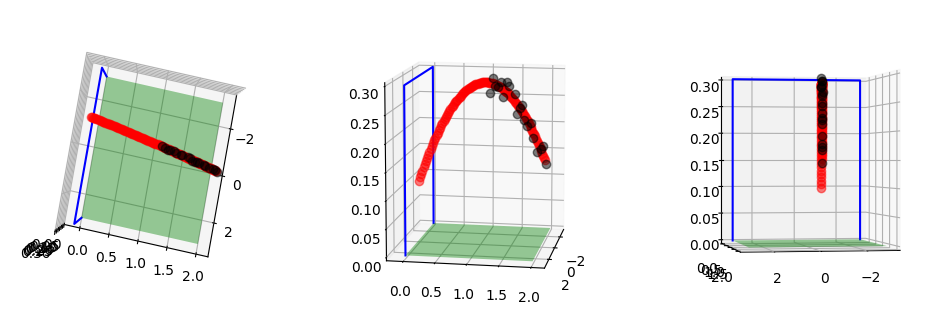

In [ ]:
# displaying the polynomial regression (degree 2) estimative with the 3 learning rates

display(HTML(str("<font size=4><b> Kick 2 - Poly Regression </b></font>")))

for i in learning_rate:
    display(HTML(str("<font size=3><b> - Learning Rate: </b></font>"+str(i))))
    
    lr_x = PolynomialRegression(2, i)
    func_x = lr_x.fit(time.reshape(-1,1),X[:,0])

    lr_y = PolynomialRegression(2, i)
    func_y = lr_y.fit(time.reshape(-1,1),X[:,1])

    lr = PolynomialRegression(2, i)
    func = lr.fit(X,Y.flatten())
    
    show_trajectory((x,y,z), (lr_x,lr_y,lr))
    
    y_pred = lr.predict(X)

    display(HTML(str("<font size=2><i> MSE: </i></font>"+str(round(mean_squared_error(Y, y_pred),2)))))
    display(HTML(str("<font size=2><i> MAPE: </i></font>"+str(round(mean_absolute_percentage_error(Y, y_pred),2)))))

The problem identified using Linear Regression with Kick 2 does not occour when we use Polynomial Regression with degree 2 (the ball falls!). The learning rate has a crucial role in the strength of the fall. Based on the plots by learning rate, we identified a correlation: the higher the learning rate the stronger the fall. Independent to the 3 learning rate chosen, the ball will be defended by the goalkeeper.

## Part II - Classification Task

In the second part of the work, you should solve a classification task using supervised learning methods. For this
task, you can use libraries that implement the methods you want to use. For this task, we will employ the Pen-Based
Recognition of Handwritten Digits Data Set. It is a simple and well-known image bank for image recognition. It
consists of 8-by-8-pixel gray-scale images divided into 10 classes of digits. A complete description can be found at the
following link: archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits.


In [ ]:
# Load your dataset (loaddigits) from the sklearn.datasets module
digits, target = load_digits(return_X_y = True)
images = load_digits().images


In [ ]:
# Knowing the data
display(HTML(str("<font size=4><b> Digits Dataset </b></font>")))
print("Shape", digits.data.shape)
print("Min and max values", stats.describe(digits[0]).minmax)
print("Mean", stats.describe(digits[0]).mean)
print("Variance", stats.describe(digits[0]).variance)

Shape (1797, 64)
Min and max values (0.0, 15.0)
Mean 4.59375
Variance 27.29265873015873


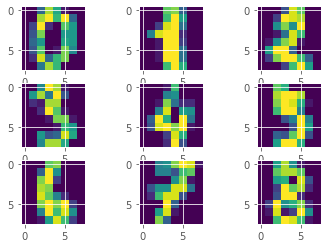

In [ ]:
# Plotting the data
display(HTML(str("<font size=4><b> Plotting the digits </b></font>")))
k = 0
for i in range(3):
    for j in range(3):
        ax = plt.subplot2grid((3,3), (i,j))
        ax.imshow(images[k])
        k+=1
plt.show()


Distribution of each class, from number 0 to number 9


(array([0.11005998, 0.11253323, 0.10944166, 0.11315155, 0.11191492,
        0.11253323, 0.11191492, 0.11067829, 0.10758672, 0.11129661]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

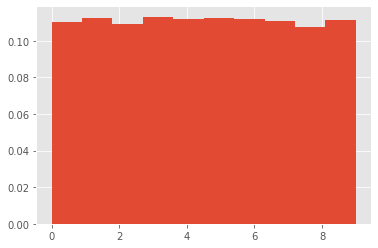

In [ ]:
# Distribution of classes in each row
display(HTML(str("<font size=4><b> Distribution of the Classes </b></font>")))
print("Distribution of each class, from number 0 to number 9")
plt.hist(target, density = True)

In [ ]:
# Apply pre-processing steps over your data that you think necessary
# Feature scaling
scaler = MinMaxScaler()
digits = scaler.fit_transform(digits)
display(HTML(str("<font size=4><b> Feature Scaling - Min Max Scaler </b></font>")))
print("Min and max values", stats.describe(digits[0]).minmax)
print("Mean", stats.describe(digits[0]).mean)
print("Variance", stats.describe(digits[0]).variance)

Min and max values (0.0, 0.9375)
Mean 0.28970424107142856
Variance 0.10746414938639973


In [ ]:
# Split your data into training/test sets (90/10)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits,target,test_size=0.1, stratify=target)
display(HTML(str("<font size=4><b> Databases Sizes - Split Train vs Test</b></font>")))
display(HTML(str("<font size=2><b> Train: </b></font>" + str(Xtrain.shape[0]) + " x "+ str(Xtrain.shape[1]))))
display(HTML(str("<font size=2><b> Test: </b></font>" + str(Xtest.shape[0]) + " x "+ str(Xtest.shape[1]))))

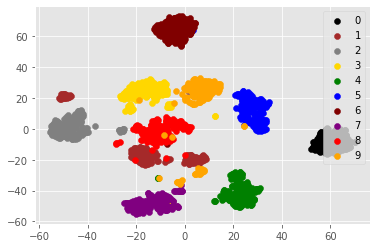

In [ ]:
# Plot your data using any visualization method that suits you (t-SNE, UMAP, etc.)
display(HTML(str("<font size=4><b> Plot with t-SNE method </b></font>")))

colors = 'black', 'brown', 'grey', 'gold', 'green', 'blue', 'maroon', 'purple', 'red', 'orange'
tsne = TSNE(n_components=2)
 
x_transformed = tsne.fit_transform(digits.data)

for i, c, label in zip(range(10), colors, [0,1,2,3,4,5,6,7,8,9]):
    plt.scatter(x_transformed[target == i, 0], x_transformed[target == i, 1], c=c, label=label)
plt.legend()
plt.show()

### Method 1 - Logistic Regression (LR)

In [ ]:
display(HTML(str("<font size=4><b> Logistic Regression with 5 Cross Validations </b></font>")))
param_grid = [
    {'penalty' : ['l2'],
     'C' : np.linspace(0, 1, 5)}]


logisticRegr = LogisticRegression()

lr_cv = GridSearchCV(estimator = logisticRegr, 
                        param_grid = param_grid, 
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

lr_cv.fit(Xtrain, Ytrain);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.9s finished


In [ ]:
display(HTML(str("<font size=4><b> Ranking the Scores </b></font>")))
cv_results = pd.DataFrame(lr_cv.cv_results_)
cv_results[['params', 'mean_fit_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

,params,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 0.0, 'penalty': 'l2'}",0.178482,0.098949,0.098949,5
1,"{'C': 0.25, 'penalty': 'l2'}",0.253361,0.971398,0.953623,4
2,"{'C': 0.5, 'penalty': 'l2'}",0.243046,0.980674,0.959806,3
3,"{'C': 0.75, 'penalty': 'l2'}",0.235324,0.984384,0.964752,2
4,"{'C': 1.0, 'penalty': 'l2'}",0.249250,0.986085,0.966609,1


In [ ]:
display(HTML(str("<font size=4><b> Choosing the Best Hyperparameters </b></font>")))
best_score = lr_cv.best_score_
best_hyperparams = lr_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9666093337919964 corresponding to hyperparameters {'C': 1.0, 'penalty': 'l2'}


In [ ]:
# Train with cross-validation two different SL methods in the classification task for the 10 digit-classification
display(HTML(str("<font size=4><b> Fitting and Predicting with Best Configuration </b></font>")))
logisticRegr = LogisticRegression(C=1,penalty='l2')
logisticRegr.fit(Xtrain, Ytrain)
y_pred = logisticRegr.predict(Xtest)

In [ ]:
display(HTML(str("<font size=4><b> Precision, Recall, F1-Score and Support </b></font>")))
# Evaluate different hyperparameters of your model using appropriate metrics (accuracy, recall, f1, etc.)
print(classification_report(Ytest, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      1.00      0.95        18
           2       0.95      1.00      0.97        18
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00        18
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       0.94      0.83      0.88        18
           9       0.94      0.89      0.91        18

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



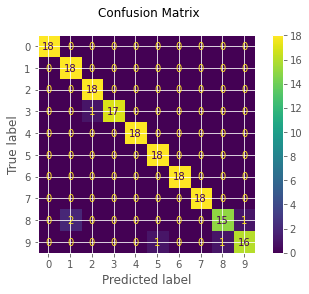

In [ ]:
display(HTML(str("<font size=4><b> Confusion Matrix </b></font>")))
# Plot the confusion matrix and corresponding metrics that you will use to assess the model quality
disp = metrics.plot_confusion_matrix(logisticRegr, Xtest, Ytest)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### Method 2 - Support Vector Classifier (SVC)

In [ ]:
display(HTML(str("<font size=4><b> Support Vector Classifier with 5 Cross Validations </b></font>")))
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                      'C': [5, 10]}]

model = SVC(kernel= "rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(Xtrain, Ytrain);

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.6s finished


In [ ]:
display(HTML(str("<font size=4><b> Ranking the Scores </b></font>")))
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['params', 'mean_fit_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

,params,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,"{'C': 5, 'gamma': 0.01}",0.082908,0.987167,0.979597,2
1,"{'C': 5, 'gamma': 0.001}",0.212437,0.936302,0.934459,4
2,"{'C': 5, 'gamma': 0.0001}",0.396554,0.178254,0.170724,6
3,"{'C': 10, 'gamma': 0.01}",0.063847,0.992270,0.983308,1
4,"{'C': 10, 'gamma': 0.001}",0.148282,0.958411,0.949295,3
5,"{'C': 10, 'gamma': 0.0001}",0.385460,0.669293,0.659877,5


In [ ]:
display(HTML(str("<font size=4><b> Choosing the Best Hyperparameters </b></font>")))
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9833084890876428 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [ ]:
# Train with cross-validation two different SL methods in the classification task for the 10 digit-classification
display(HTML(str("<font size=4><b> Fitting and Predicting with Best Configuration </b></font>")))
model = SVC(C=10, gamma=0.01, kernel="rbf")
model.fit(Xtrain, Ytrain)
y_pred = model.predict(Xtest)

In [ ]:
display(HTML(str("<font size=4><b> Precision, Recall, F1-Score and Support </b></font>")))
# Evaluate different hyperparameters of your model using appropriate metrics (accuracy, recall, f1, etc.)
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.90      1.00      0.95        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       0.95      1.00      0.97        18
           6       1.00      1.00      1.00        18
           7       0.94      0.94      0.94        18
           8       1.00      0.78      0.88        18
           9       0.84      0.89      0.86        18

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted avg       0.96      0.96      0.96       180



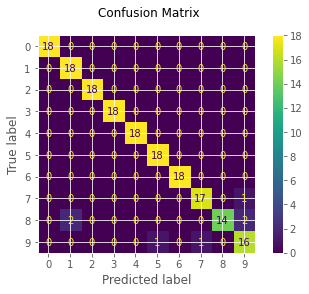

In [ ]:
display(HTML(str("<font size=4><b> Confusion Matrix </b></font>")))
# Plot the confusion matrix and corresponding metrics that you will use to assess the model quality
disp = metrics.plot_confusion_matrix(model, Xtest, Ytest)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Our Analysis - Wrapping Up

### Kicks Dataset

#### 1) Normalization
**Do we apply normalization in these datasets?**

In our point of view, we didn't find the normalization a good option, once it could deeply affect the range of the values. The goalkeeper could defend the ball if values of a given axis were below 0.3 range. If we normalize the dataset, then we could not easily found this threshold (would it be higher?). This situation would also occur with other parameters.

#### 2) Degree

**Does the degree value impact in the regressions?**

Yes. We used linear (degree 1) and polynomial (only degree 2) regressions. We don't find interesting to try to fit the points with a degree 3 or higher (maybe in a real situation where the ball kicks on the ground and in other players, turning the trajectory very irregular). 

In kick 1, after plotting the data, we could see that the points formed a "straight line". Based on that, we apply linear and polynomial and concluded that the polynomial regression presented a better fit.

In kick 2, we found the opposite situation. The points seems to form a parabole, not a straight line as we found in kick 1. To fit that curve, we applied both linear and polynomial regression and found that polynomial regression with degree 2 produced better results

#### 3) Learning

**How does the learning rate impact the results?**

The learning rates were arbitrarely chosen. When we combined polynomial regression and a learning rate higher than 0.25, our solution stopped converging.

#### 4) Metrics

**What can we say about the used metrics?**

We adopted two metrics: MSE (Mean Squared Error) and MAPE (Mean Absolute Percentage Error). The MSE metric shows how much the algorithm is producing erroneous results in terms of absolute values. The MAPE describes the same results, but in terms of relative (percentual) values.

Both MSE and MAPE for all learning rates and algorithms resulted in low level of errors. This is due the fact that we used values that were already trained.

### Digits Dataset

#### 1) Normalization
**Did the feature scaling of the data impact the results?**

Yes.

In the digits dataset it significantly impacted the results. We took as example one sample of the data to verify the min and max values (0.0, 15.0), the mean (4.59) and variance (27.29) before the normalization. We applied the Min Max Scaler, obtaining the following results: min and max values (0.0, 0.93), mean (0.28) and variance (0.10). The Min Max Scaler shrank the range of data prior to the model fit, standardizing the way features contribute to the learn and fit stage of the model.


### 2) Distribution of the Classes

**How are the classes distributed?**

In the digits dataset, we identified that the classes are almost **equally** distributed. The classes are the numbers ranging from 0 to 9 and, by the plot of the distribution, each class appear between 10% and 11% in the dataset. In our opinion, the balanced characteristic of the datasetmight improve the classifier performance.

By plotting the data with t-SNE method we could also verify that the classes are very separated from each other, clearly verifying  that each class form a cluster in the 2d graph of t-SNE method.

### 3) Cross Validation 

**What was the point of using cross validation?**

The idea of using cross-validation in our point of view is very reasonable, once it train in multiple train and test splits of the dataset and, to the best of our knowlede, better indicating how the chosen models (Logistic Regression and SVC) are performing.


### 4) Metrics

**Is there a difference in the results obtained in each classification method?**

Yes, there is a small difference between the mean accuracy, precision, recall, f-measure and support but, in general, both Logistic Regression and SVC performs very well (above 95% in all of the mentioned metrics).

**Which classes contribute the most to this result?**

The classes of numbers 9 and 0 tends to have the worst classification. Without them both classifiers would reach mean metrics' values closer to 1 (100%). At some moments that we run the classifier, these classes reached values up to 0.75 of recall, a not so satisfactory result when compared to the results of other classes. These occurrences were found both in Logistic Regression and SVC applications.

### 5) Confusion Matrix

**Does the confusion matrix show relevant and unknown knowledge over the dataset?**

Yes. By showing the results of the metrics (precision, recall, etc) related to each class in a table format, we could verify that two classes were the most "problematic". However, we could not verify what was the misplacement. By plotting the confusion matrix, we could verify that in some cases, the true label (for example, the digit 8) was erroneous classified by a given digit (for example, 9). In a real scenario, this is a very relevant information.

## Responsabilities
**André Gomes Regino (RA 230252):** was responsible for the pre-processing (Digits), t-SNE (Digits), Logistic Regression (Digits) and the Wrapping up section.

**Hismael (RA 265684):** was responsible for Linear Regression (Kicks), Polynomial Regression (Kicks) and SVC (Digits).